이 관련 포스팅은 [hand on machine learning ](http://shop.oreilly.com/product/0636920052289.do)을 참고하여 작성 했습니다

## CHAPTER 4 

# Training Models
머신러닝에 대해 많이 알아 보았는데요 사실 training 알고리즘은 거의 블랙 박스 같아요 전에 해왔던 많은 것들이 진행과정을 알수없이 진행 했었는데요 예를 들면 최적의 회귀 시스템이나 숫자 이미지 분별 스팸 구별 등을요. 정말 많은 상황들에서 우리는 자세히 알 필요도 없이 진행 했습니다.

헌데 이해를 하게되면 빠르게 적합한 모델을 찾는데에 큰 도움을 줄겁니다. 올바른 트레이닝 알고리즘을 쓰면 하이퍼 파라미터 세팅도 좋고 작업도 좋으니깐요. 원리이해는 디버깅 문제해결과 실행에러 분석을 더 효과적으로 할겁니다. 마지막으로 뉴럴네트워크를 이해하고 만들고 실행하는데에도 큰 도움을 줍니다.

이번 파트는 가장 단순한 모델 중 하나인 선형회귀를 배울 건데요 두가지 다른 방법으로 실행할 겁니다.
바로 직접적으로 최적의 모델과 트레이닝 셋을 찾는 "closed form"과 반복적으로 최적의 상황을 탐색하는 Gradient Descent(GD) 가 그것입니다.
여기서 우린 GD를 나중에 배울 뉴럴 네트워크에서도 사용 할것입니다. Batch GD,Mini-batch GD, and Stochastic GD 
일단 우린 Polynomial Regression (다항식 회귀)를 배울 겁니다. 다항식 회귀는 비선형 데이터에 적합한데요,선형회귀보다 더 많은 파라미터를 가지고 있습니다.즉 오버피팅 되기 쉽다는 뜻인데요.어떻게 오버피팅을 확인하고 리스크를 줄일지 알아봅시다.
그리고 마지막으로 대체적으로 classification에  많이 사용하는 두 모델을 더 배울겁니다. 바로 Logistic Regression 과 Softmax Regression 입니다.

챕터 1에서 삶의 만족도 단순 회귀 모델은: **life_satisfaction** = $\theta_0 + \theta_1 $* GDP_per_capita 
여기서 파라미터는 $\theta_0, \theta_1 $ 이렇게 두개가 있는데요
선형 회귀 공식은 단순히 feature를 다 더하면 됩니다 이거를 bias term 또는 intercept term 이라고 불리우는데요 
공식으로는 

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2+ .....+ \theta_nx_n$

- $\hat{y}$ 는 예측값
- $n$ 은 피쳐 넘버
- $x_i$ 은 피쳐 값
- $\theta$ 는 $j^{th}$ 모델 파라미터 입니다

이것을 벡터로 이용하면 공식이 

- $\hat{y} = h_\theta(\mathbf{x}) = \theta^T * \mathbf{x}$


위에 있는 것이 선형회귀 모델입니다. 그럼 지금 어떻게 train할까요? 가장 적합이 좋은 파라미터를 가진 모델과 그모델의 평균을 세팅 해야 하는데요 여기서 목적은 첫번째로 어떻게 하면 좋고 나쁜지를 측정해야 합니다. 챕터 2에서 대개적으로 많이쓰는 측정 퍼포먼스인 Root Mean Square Error(RMSE)로 선형회귀에서 값은 낮은 $\theta$ 값을 찾아야합니다. 여기서는 더 단순한 Mean Square Error(MSE)함수를 사용할겁니다.ROOT의 유무 차이만 있을 뿐이므로 값이 거의 같다고 보시면 돼요.

RMSE의 공식은 
- $ MSE(\mathbf{X},h_\theta) = 1/m\sum_{i = 1}^{m}(\theta^T * \mathbf{x}^{(i)} - y^{(i)})^2 $

# Setup 
가장 먼저 공통으로 쓸 라이브러리를 import 합니다. 그리고 Matplotlib 를 기본 세팅을 정하고 save할 함수를 설정합니다.

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = "."

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images",  fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action = "ignore", module = "scipy", message ="^internal gelsd")

# The Normal Equation
가장 낮은 $\theta$ 를 찾기 위해 최소 비용 함수를 사용 할겁니다. `closed-form solution` 방법으로  수학적인 방법으로는 결과가 바로 직접적입니다. `NORMAL Equation`으로 불리는데 공식은 아래에

- $\hat{\theta}  =  (\mathbf{X}^T*X)^{-1}*\mathbf{X}^T*y$

In [3]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X +np.random.randn(100,1)

Saving figure generated_data_plot


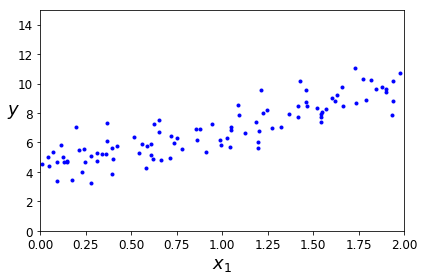

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [5]:
X_b = np.c_[np.ones((100,1)),X] # x0 = 1 각 인스턴스에 추가 해야 합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

$\theta_0 = 3.79와 \theta_1 = 3.11를 대신해서  \theta_1 = \theta_0 = 4, \theta_1 = 3$ 이 되었습니다.충분히 가깝지만 잡음이 있는한  원래 함수의 정확한 파라미터를 알수가 없습니다.

$\hat{\theta}$를 이용해서 예측을 해보겠습니다.

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]#add x0 = 1 each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Saving figure Normal_Equation_model


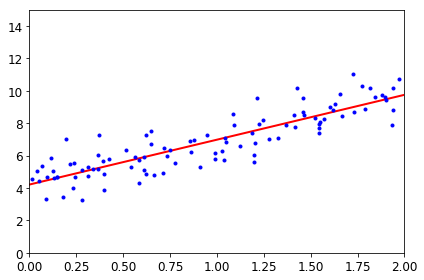

In [8]:
plt.plot(X_new,y_predict,"r-",linewidth = 2, label = "Prediction")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
save_fig("Normal_Equation_model")
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_,lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

## Batch Gradient Descent
Global minimum을 찾는 방법 중에 첫번쨰로 Batch Gradient Descent를 찾을 수 있는데요
다만 Batch는 시간이 오래 걸린다는 단점이 있습니다. 후에 더 짧은 방법이 나오니 우선  Batch부터 확인해 보아요

In [12]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

theta_path_bgd = []

def plot_gradient_descent(theta,eta,theta_path = None):
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_iteration = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta- eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0,2,0,15])
    plt.title(r"$\eta = {}$".format(eta), fontsize =16)

Saving figure gradient_descent_plot


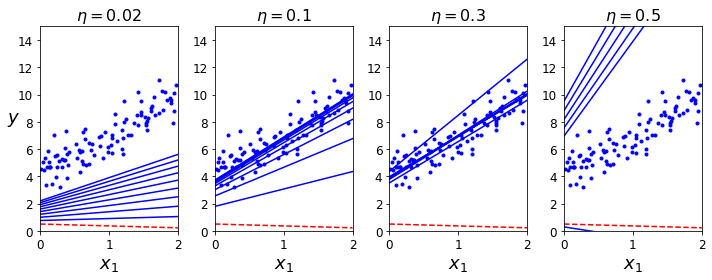

In [21]:
np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

plt.figure(figsize = (10,4))
plt.subplot(141); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(142); plot_gradient_descent(theta, eta=0.1)
plt.subplot(143); plot_gradient_descent(theta, eta=0.3)
plt.subplot(144); plot_gradient_descent(theta, eta=0.5)
save_fig('gradient_descent_plot')
plt.show()

## Convergence Rate
오목한 부분에서 기울기가 급변하지 않는다고 해서 최적값이 된건 아닙니다. 단지 learning rate값을 고정해서 최적값에 향해 가는 겁니다.
그러니 시간이 오래 걸릴 수 밖에 없습니다.
걸리는 시간은 O(1/$\epsilon$) 

* $\epsilon$(tolerance)로 오차라고 생각하면 됨 

# Stochastic Gradient Descent


모든 스텝을 랜덤으로 골라서 하는 것이므로 대규모의 데이터 셋을 할때는 Batch 보다는 더 유용합니다. 비록 불규칙적이지만
그렇기에 local minimum 에서 벗어나는데 도움을 줍니다.
하지만 딜레마는 최소값에 정착을 못 합니다. 방법으로는 simulated annealing 로 annealing 쇠를 달음질 하는 것을 의미하는데 말 그래도 처음에는 
learning rate를 크게 했다가 조금씩 조금씩 줄입니다. 각 learning rate step을 learning schedule라고 불립니다.

In [23]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):